In [2]:
import zipfile as zp
file  = zp.ZipFile("C://Users//DELL//Desktop//New folder//archive (13).zip",'r')
file.extractall('TB_Chest_Radiography_Database')
file.close()


In [3]:
normal_dir = "C:/Users/DELL/Desktop/New folder/archive (13)/TB_Chest_Radiography_Database/Normal"
tuber_dir = "C:/Users/DELL/Desktop/New folder/archive (13)/TB_Chest_Radiography_Database/Tuberculosis"


import os
from PIL import Image
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocessing_images(image_dir,label):
    images=[]
    labels =[]
    for filename in os.listdir(image_dir):
        if filename.endswith(".png"):
            image_path = os.path.join(image_dir,filename)
            image = Image.open(image_path)
            image = image.convert("RGB")
            image = image.resize((200,200))
            image = np.array(image) /255.0
            images.append(image)
            labels.append(label)
    return images,labels


normal_images, normal_labels = preprocessing_images(normal_dir,label=0)
tuber_images ,tuber_labels = preprocessing_images(tuber_dir,label=1)


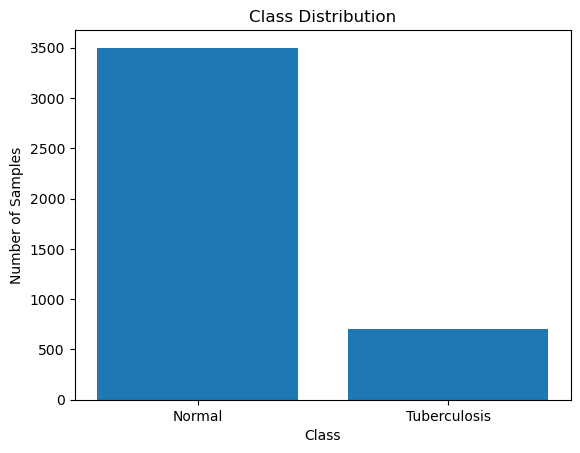

Normal Class Frequency: 0.83
Tuberculosis Class Frequency: 0.17


In [4]:
import matplotlib.pyplot as plt

# Count the number of samples in each class
num_normal_samples = len(normal_images)
num_tuberculosis_samples = len(tuber_images)

# Visualize the class distribution
class_names = ['Normal', 'Tuberculosis']
class_counts = [num_normal_samples, num_tuberculosis_samples]

plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

# Calculate class frequencies
total_samples = num_normal_samples + num_tuberculosis_samples
normal_frequency = num_normal_samples / total_samples
tuberculosis_frequency = num_tuberculosis_samples / total_samples

print(f'Normal Class Frequency: {normal_frequency:.2f}')
print(f'Tuberculosis Class Frequency: {tuberculosis_frequency:.2f}')


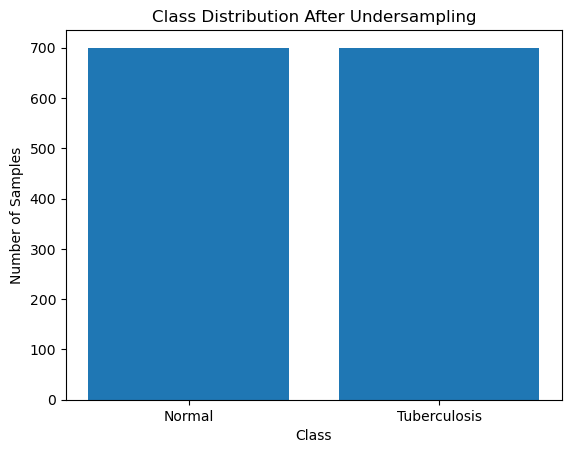

Undersampled Normal Class Frequency: 0.50
Undersampled Tuberculosis Class Frequency: 0.50


In [5]:
import numpy as np


num_samples_to_keep = min(num_normal_samples, num_tuberculosis_samples)


undersampled_normal_indices = np.random.choice(range(num_normal_samples), size=num_samples_to_keep, replace=False)
undersampled_normal_images = [normal_images[i] for i in undersampled_normal_indices]
undersampled_normal_labels = [normal_labels[i] for i in undersampled_normal_indices]

undersampled_images = undersampled_normal_images + tuber_images
undersampled_labels = undersampled_normal_labels + tuber_labels


undersampled_data = list(zip(undersampled_images, undersampled_labels))
np.random.shuffle(undersampled_data)
undersampled_images, undersampled_labels = zip(*undersampled_data)

# Visualize the class distribution after undersampling
num_undersampled_normal_samples = num_samples_to_keep
num_undersampled_tuberculosis_samples = num_tuberculosis_samples

class_names = ['Normal', 'Tuberculosis']
class_counts = [num_undersampled_normal_samples, num_undersampled_tuberculosis_samples]

plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After Undersampling')
plt.show()

# Calculate class frequencies after undersampling
total_undersampled_samples = num_undersampled_normal_samples + num_undersampled_tuberculosis_samples
undersampled_normal_frequency = num_undersampled_normal_samples / total_undersampled_samples
undersampled_tuberculosis_frequency = num_undersampled_tuberculosis_samples / total_undersampled_samples

print(f'Undersampled Normal Class Frequency: {undersampled_normal_frequency:.2f}')
print(f'Undersampled Tuberculosis Class Frequency: {undersampled_tuberculosis_frequency:.2f}')


In [6]:
images = normal_images + tuber_images
labels = normal_labels + tuber_labels


images = np.array(images)
labels = np.array(labels)



In [7]:
from sklearn.model_selection import train_test_split
train_images , test_images ,train_labels , test_labels = train_test_split(images,labels,test_size=0.2,random_state=42)

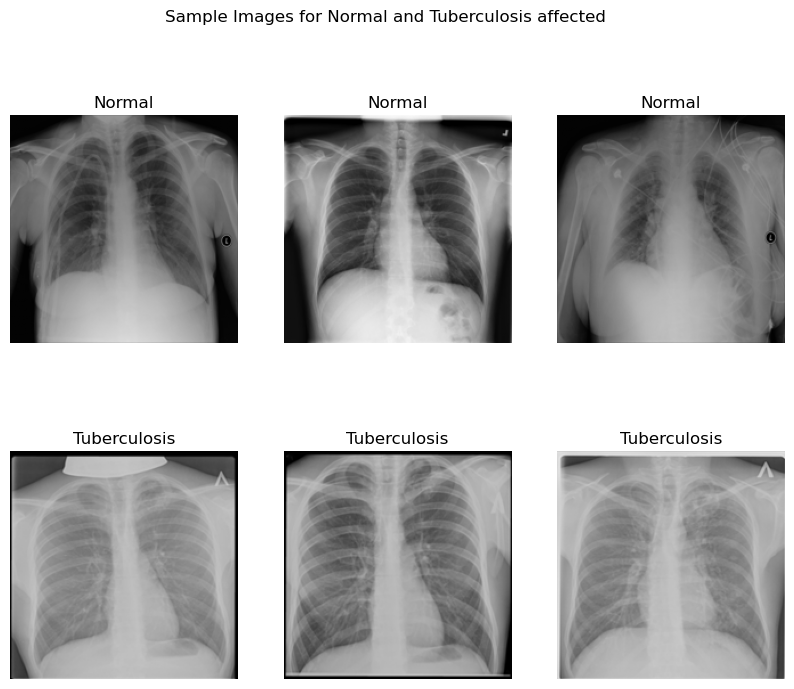

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.imshow(normal_images[i])
    plt.title("Normal")
    plt.axis('off')

    plt.subplot(2,3,i+4)
    plt.imshow(tuber_images[i+4])
    plt.title("Tuberculosis")
    plt.axis('off')
plt.suptitle("Sample Images for Normal and Tuberculosis affected")
plt.show()


In [9]:
from tensorflow.keras.layers import RandomFlip, RandomRotation , RandomZoom,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,Conv2D,Flatten,MaxPool2D

model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip('horizontal'),
    RandomRotation(0.2),
    RandomZoom(0.1)
])

model1.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())


model1.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1, activation='sigmoid'))



In [10]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 200, 200, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,528,385 (74.49 MB)

 Trainable params: 19,527,425 (74.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [11]:
history1=model1.fit(train_images , train_labels , batch_size=32, epochs=10,validation_data=(test_images,test_labels ))

Epoch 1/10


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.8303 - loss: 0.0000e+00

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 56s 469ms/step - accuracy: 0.8303 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 42s 401ms/step - accuracy: 0.8428 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 43s 409ms/step - accuracy: 0.8254 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 382ms/step - accuracy: 0.8250 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 379ms/step - accuracy: 0.8359 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 371ms/step - accuracy: 0.8420 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 365ms/step - accuracy: 0.8322 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━

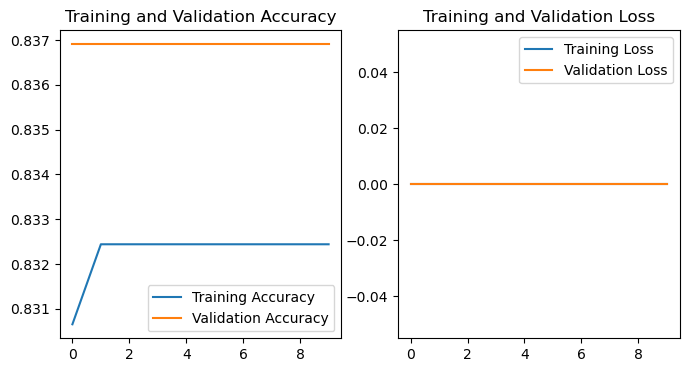

In [12]:

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
from tensorflow.keras.applications import resnet
model_resnet = resnet.ResNet50(input_shape=(200,200,3), include_top=False, weights='imagenet')

In [14]:
for layer in model_resnet.layers:
   layer.trainable=False
model_resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 206, 206,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 100, 100,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 100, 100,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 100, 100,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 102, 102,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 50, 50,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 50, 50,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 50, 50,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 50, 50,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 50, 50,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 50, 50,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 50, 50,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 50, 50,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 50, 50,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 50, 50,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
model = Sequential()
model.add(model_resnet)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model1.fit(train_images , train_labels , batch_size=32, epochs=10,validation_data=(test_images,test_labels ))

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 374ms/step - accuracy: 0.8343 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 377ms/step - accuracy: 0.8232 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 365ms/step - accuracy: 0.8364 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 360ms/step - accuracy: 0.8388 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 357ms/step - accuracy: 0.8328 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 38s 363ms/step - accuracy: 0.8388 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 37s 356ms/step - accuracy: 0.8370 - loss: 0.0000e+00 - val_accuracy: 0.8369 - val_loss: 0.0000e+00
Epoch 8/10
105/105 ━━━━━━━━

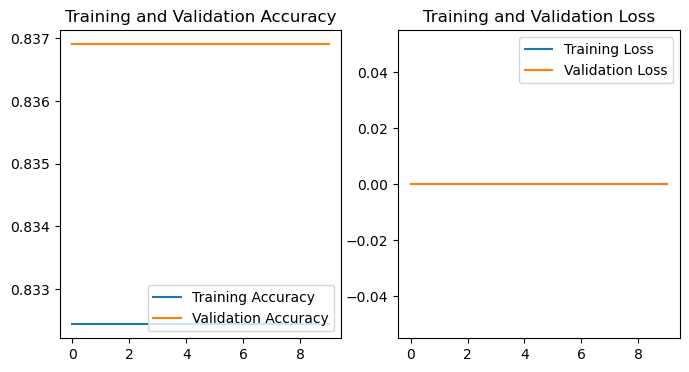

In [17]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
predictions1 = model1.predict(test_images)
predic_class1 = ( predictions1 > 0.5).astype('int32')

predictions2 = model.predict(test_images)
predic_class2 = ( predictions2 > 0.5).astype('int32')

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step


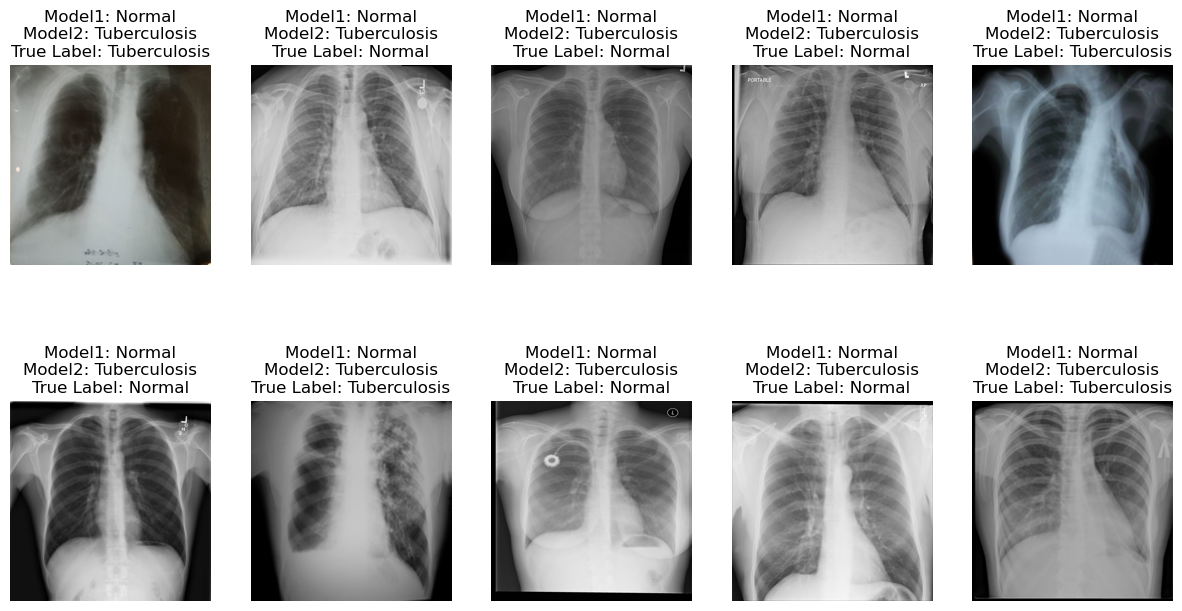

In [20]:
import random
import matplotlib.pyplot as plt

def visualize_random_predictions(images, labels1, labels2, true_labels, class_names, num_samples=10):
    # Select random indices
    indices = random.sample(range(len(images)), num_samples)
    
    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx])
        
        label1 = class_names[labels1[idx][0]]
        label2 = class_names[labels2[idx][0]]
        true_label = class_names[true_labels[idx]]
        
        plt.title(f'Model1: {label1}\nModel2: {label2}\nTrue Label: {true_label}')
        plt.axis('off')
    plt.show()

# Define class names (e.g., 'Normal' and 'Tuberculosis')
class_names = ['Normal', 'Tuberculosis']

# Assuming you have the true labels available in a separate array named true_labels
# Visualize predictions on a random subset of test images
visualize_random_predictions(test_images, predic_class1, predic_class2, test_labels, class_names, num_samples=10)
